In [3]:
import os 
import cv2
import glob
import scipy
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.models import Sequential
from keras.preprocessing import image
from keras.utils.vis_utils import plot_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import preprocess_input
from keras.layers import Convolution2D,Dense,MaxPool2D,Activation,Dropout,Flatten
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D

In [2]:
def get_files(directory):
  if not os.path.exists(directory):
    return 0
  count=0
  # folder crawling
  for current_path,dirs,files in os.walk(directory):
    for dr in dirs:
      count+= len(glob.glob(os.path.join(current_path,dr+"/*")))
  return count
train_dir ="./output/train"
test_dir="./output/val"

In [3]:
train_samples =get_files(train_dir)
n_classes=len(glob.glob(train_dir+"/*")) 
test_samples=get_files(test_dir)
print(n_classes,"Classes")
print(train_samples,"Train images")
print(test_samples,"Test images")

38 Classes
43429 Train images
10876 Test images


In [4]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
    )
test_datagen=ImageDataGenerator(rescale=1./255)

In [5]:
input_shape=(224,224,3)
train_generator =train_datagen.flow_from_directory(train_dir,target_size=(224,224),batch_size=32)
test_generator=test_datagen.flow_from_directory(test_dir,shuffle=True,target_size=(224,224),batch_size=32)

Found 43429 images belonging to 38 classes.
Found 10876 images belonging to 38 classes.


In [1]:
model = Sequential()
model.add(Conv2D(32, (5, 5),input_shape=input_shape,activation='relu',name="conv2d_1"))
model.add(MaxPooling2D(pool_size=(3, 3),name="max_pooling2d_1"))
model.add(Conv2D(32, (3, 3),activation='relu',name="conv2d_2"))
model.add(MaxPooling2D(pool_size=(2, 2),name="max_pooling2d_2"))
model.add(Conv2D(64, (3, 3),activation='relu',name="conv2d_3"))
model.add(MaxPooling2D(pool_size=(2, 2),name="max_pooling2d_3"))   
model.add(Flatten(name="flatten_1"))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu'))          
model.add(Dense(n_classes,activation='softmax'))
model.summary()

NameError: name 'Sequential' is not defined

In [7]:
validation_generator = train_datagen.flow_from_directory(
                       test_dir,
                       target_size=(224, 224),
                       batch_size=32)

Found 10876 images belonging to 38 classes.


In [8]:
model.compile(optimizer='adam',loss = 'categorical_crossentropy',metrics=['accuracy'])
history1 = model.fit(
    train_generator,
    steps_per_epoch=None,
    epochs=25,
    validation_data=validation_generator,
    validation_steps=None,
    verbose=1,
    callbacks=[ReduceLROnPlateau(monitor='val_loss', factor=0.3,patience=3, min_lr=0.000001)],
    shuffle=True
    )

Epoch 1/25
1358/1358 [==============================] - 1254s 923ms/step - loss: 1.3930 - accuracy: 0.6000 - val_loss: 0.6717 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2/25
1358/1358 [==============================] - 1068s 786ms/step - loss: 0.6358 - accuracy: 0.7988 - val_loss: 0.3874 - val_accuracy: 0.8817 - lr: 0.0010
Epoch 3/25
1358/1358 [==============================] - 1054s 776ms/step - loss: 0.4564 - accuracy: 0.8524 - val_loss: 0.3290 - val_accuracy: 0.9011 - lr: 0.0010
Epoch 4/25
1358/1358 [==============================] - 1054s 776ms/step - loss: 0.3712 - accuracy: 0.8794 - val_loss: 0.2878 - val_accuracy: 0.9129 - lr: 0.0010
Epoch 5/25
1358/1358 [==============================] - 1053s 775ms/step - loss: 0.3206 - accuracy: 0.8968 - val_loss: 0.2717 - val_accuracy: 0.9182 - lr: 0.0010
Epoch 6/25
1358/1358 [==============================] - 1050s 773ms/step - loss: 0.2806 - accuracy: 0.9094 - val_loss: 0.2671 - val_accuracy: 0.9150 - lr: 0.0010
Epoch 7/25
1358/1358 [======

In [11]:
scores=model.evaluate(test_generator)

340/340 [==============================] - 55s 161ms/step - loss: 0.1080 - accuracy: 0.9726


In [12]:
scores

[0.10800498723983765, 0.9726002216339111]

In [14]:
history1

In [16]:
history1.params

{'verbose': 1, 'epochs': 25, 'steps': 1358}

In [17]:
history1.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

In [19]:
len(history1.history['loss'])

25

In [22]:
history1.history['loss'][20:]

[0.062069766223430634,
 0.05663657188415527,
 0.04923561215400696,
 0.047467563301324844,
 0.046296726912260056]

In [23]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']

loss = history1.history['loss']
val_loss = history1.history['val_loss']

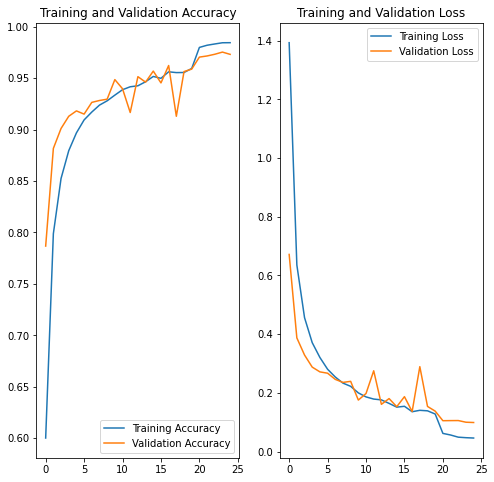

In [25]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(25), acc, label='Training Accuracy')
plt.plot(range(25), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(25), loss, label='Training Loss')
plt.plot(range(25), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [34]:
model.save('./saved_model/detect_using_cnn_25epc.h5')

In [52]:
model1=tf.keras.models.load_model('./saved_model/detect_using_cnn.h5',compile=False)

In [53]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      2432      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 33, 33, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 64)       0

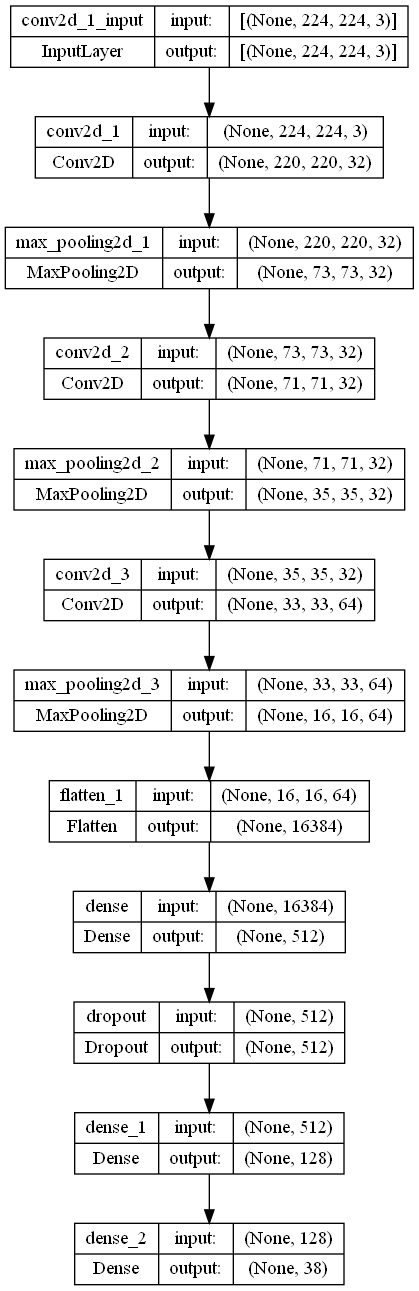

In [37]:
tf.keras.utils.plot_model(model1,to_file='model_plot.png',show_shapes=True)

In [54]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

In [55]:
layers_outputs=[layer.output for layer in model1.layers[1:]]

In [56]:
visualize_model=tf.keras.models.Model(inputs=model1.input,outputs=layers_outputs)

In [57]:
img=load_img('./media/b.jpg',target_size=(224,224))

In [58]:
x=img_to_array(img)

In [59]:
x.shape

(224, 224, 3)

In [60]:
x=x.reshape(1,224,224,3)

In [61]:
x=x/225

In [62]:
feature_maps=visualize_model.predict(x)
print(len(feature_maps))

1/1 [==============================] - 0s 254ms/step
10


In [63]:
layer_names=[layer.name for layer in model1.layers]
print(layer_names)

['conv2d_1', 'max_pooling2d_1', 'conv2d_2', 'max_pooling2d_2', 'conv2d_3', 'max_pooling2d_3', 'flatten_1', 'dense', 'dropout', 'dense_1', 'dense_2']


In [21]:
%matplotlib inline

(1, 73, 73, 32)


C:\Users\Sagar\AppData\Local\Temp\ipykernel_5828\2021712233.py:10: RuntimeWarning: invalid value encountered in divide
  x/=x.std()


(1, 71, 71, 32)


C:\Users\Sagar\AppData\Local\Temp\ipykernel_5828\2021712233.py:10: RuntimeWarning: invalid value encountered in divide
  x/=x.std()


(1, 35, 35, 32)


C:\Users\Sagar\AppData\Local\Temp\ipykernel_5828\2021712233.py:10: RuntimeWarning: invalid value encountered in divide
  x/=x.std()


(1, 33, 33, 64)


C:\Users\Sagar\AppData\Local\Temp\ipykernel_5828\2021712233.py:10: RuntimeWarning: invalid value encountered in divide
  x/=x.std()


(1, 16, 16, 64)


C:\Users\Sagar\AppData\Local\Temp\ipykernel_5828\2021712233.py:10: RuntimeWarning: invalid value encountered in divide
  x/=x.std()


(1, 16384)
(1, 512)
(1, 512)
(1, 128)
(1, 38)


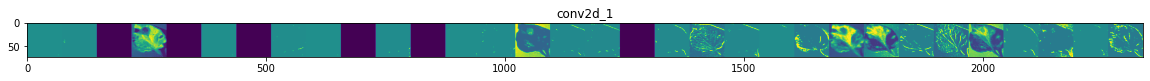

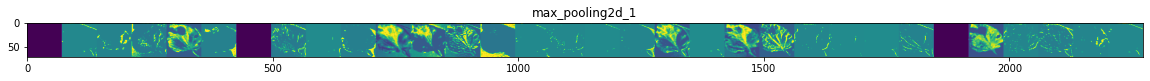

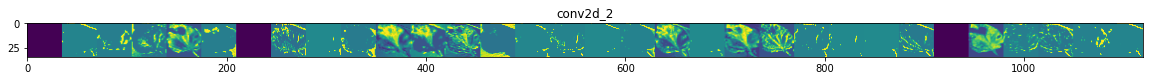

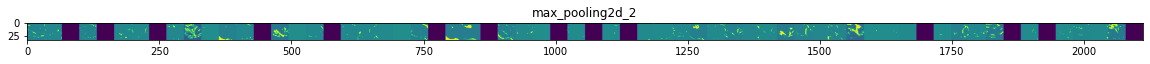

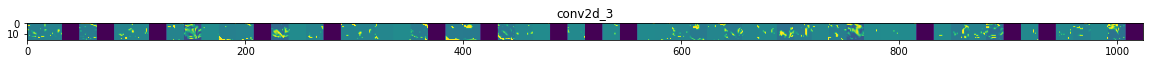

In [22]:
for layer_names,feature_maps in zip(layer_names,feature_maps):
    print(feature_maps.shape)
    if len(feature_maps.shape)==4:
        channels=feature_maps.shape[-1]
        size=feature_maps.shape[1]
        display_grid=np.zeros((size,size*channels))
        for i in range(channels):
            x=feature_maps[0,:,:,i]
            x-=x.mean()
            x/=x.std()
            x*=64
            x+=128
            x=np.clip(x,0,255).astype('uint8')
            display_grid[:,i*size:(i+1)*size]=x
        scale=20./channels
        plt.figure(figsize=(scale*channels,scale))
        plt.title(layer_names)
        plt.grid(False)
        plt.imshow(display_grid,aspect='auto',cmap='viridis')
        plt.savefig('feature.pdf')

In [49]:
import pydot_ng as pydot
pydot.find_graphviz()
plot_model(model1, to_file='./model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


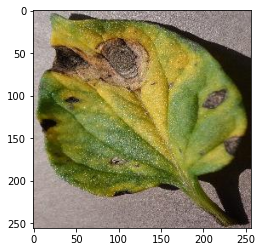

In [50]:
im=plt.imread('./media/b.JPG')
plt.imshow(im)
    

1/1 [==============================] - 0s 244ms/step


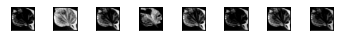

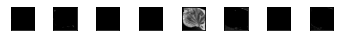

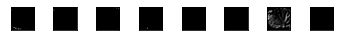

In [64]:
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
from matplotlib import pyplot as plt
ixs = [0,2,4]
outputs=[model1.layers[i].output for i in ixs]
model1=Model(inputs=model1.inputs,outputs=outputs)
img= tf.keras.preprocessing.image.load_img('./media/b.JPG',target_size=(224,224))
img=tf.keras.preprocessing.image.img_to_array(img)
img=expand_dims(img,axis=0)
img=preprocess_input(img)
feature_maps=model1.predict(img)
square=8
for fmap in feature_maps:
    ix=1
    for _ in range(square):
        ax=pyplot.subplot(square,square,ix)
        ax.set_xticks([])
        ax.set_yticks([])
        pyplot.imshow(fmap[0, :, :, ix-1], cmap='gray')
        ix=ix+1
    pyplot.savefig('./filters.pdf')
    pyplot.show()

In [6]:

def create_Base_model_from_VGG16():  
    model = VGG16(
        weights = "imagenet",
        include_top=False, 
        input_shape = (224,224, 3) # goruntu boyutu
        ) 
    for layer in model.layers:
      layer.trainable = False
    return model 
create_Base_model_from_VGG16().summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [7]:
def create_Base_model_from_VGG16():  
    model = VGG16(
        weights = "imagenet",
        include_top=False, 
        input_shape = (224,224, 3) # goruntu boyutu
        ) 
    for layer in model.layers:
      layer.trainable = False
    return model 
create_Base_model_from_VGG16().summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [8]:
def add_custom_layers():
    model = create_Base_model_from_VGG16()
    x = model.output
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(256, activation="relu")(x)
    predictions = tf.keras.layers.Dense(n_classes, activation="softmax")(x)   
    # creating the final model 
    final_model = tf.keras.models.Model(
        inputs = model.input, 
        outputs = predictions)
     
    final_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  
    return final_model

add_custom_layers().summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [9]:
validation_generator = train_datagen.flow_from_directory(
                       test_dir, # same directory as training data
                       target_size=(224, 224),
                       batch_size=32)

Found 10876 images belonging to 38 classes.


In [11]:
model_from_vgg16 = add_custom_layers()
history2 = model_from_vgg16.fit(
    train_generator,
    steps_per_epoch=None,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=None,
    verbose=1,
    callbacks=[ReduceLROnPlateau(monitor='val_loss', factor=0.3,patience=3, min_lr=0.000001)],
    use_multiprocessing=False,
    shuffle=True
    )

Epoch 1/5
1358/1358 [==============================] - 9438s 7s/step - loss: 0.6382 - accuracy: 0.8171 - val_loss: 0.3181 - val_accuracy: 0.8972 - lr: 0.0010
Epoch 2/5
1358/1358 [==============================] - 7769s 6s/step - loss: 0.2704 - accuracy: 0.9106 - val_loss: 0.2255 - val_accuracy: 0.9256 - lr: 0.0010
Epoch 3/5
1358/1358 [==============================] - 6839s 5s/step - loss: 0.2214 - accuracy: 0.9253 - val_loss: 0.3011 - val_accuracy: 0.9058 - lr: 0.0010
Epoch 4/5
1358/1358 [==============================] - 7851s 6s/step - loss: 0.2008 - accuracy: 0.9318 - val_loss: 0.3705 - val_accuracy: 0.8879 - lr: 0.0010
Epoch 5/5
1358/1358 [==============================] - 7905s 6s/step - loss: 0.1766 - accuracy: 0.9403 - val_loss: 0.2653 - val_accuracy: 0.9192 - lr: 0.0010


In [12]:
model_from_vgg16.save('./detect_using_VGG16.h5')